In [ ]:
#dataset I need: first names of all bootcamp graduates/attendees (manually/scraping) - Linkedin
#treatment I need: classification based on first names into male/female (Naive Bayes with dictionaries of most common names?)

#look at word stems
#how many features 
#Facebook API is pretty limited--first names and genders from public profiles from Facebook
#Find a Wikipedia project containing all the articles: organize in a taxinomy: gender/first name with labels, look into XML dumps
#open source dictionary

#two big challenges
#Wrangling together as many as name/gender matches to create a classifier
#Wrangling together first names of bootcamp graduates

#http://stackoverflow.com/questions/33440939/cant-pip-install-packages-in-anaconda
#https://en.wikipedia.org/wiki/Category:Feminine_given_names

In [3]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import requests
from bs4 import BeautifulSoup

In [2]:
import matplotlib as mlp
mlp.use("TKAgg")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import columns as INT type look at read_csv documentation
names = pd.read_csv("NationalNames.csv", dtype = {'Count': np.int32})
len(names)/2

912716.5

In [4]:
names.head(3)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003


In [5]:
type(names.Count[1])

numpy.int32

In [6]:
names.fillna(0)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414
8,9,Bertha,1880,F,1320
9,10,Sarah,1880,F,1288


In [163]:
mary = names[names.Name == "Mary"]
mary

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1273,1274,Mary,1880,M,27
2000,2001,Mary,1881,F,6919
3238,3239,Mary,1881,M,29
3935,3936,Mary,1882,F,8148
5277,5278,Mary,1882,M,30
6062,6063,Mary,1883,F,8012
7407,7408,Mary,1883,M,32
8146,8147,Mary,1884,F,9217
9610,9611,Mary,1884,M,36


In [164]:
mary.Count.sum()

4130441

In [5]:
namegroup = names.groupby(['Name', 'Gender'])['Count'].sum()

In [29]:
namegroup.head()

Name       Gender
Aaban      M          72
Aabha      F          21
Aabid      M           5
Aabriella  F          10
Aadam      M         196
Name: Count, dtype: int32

In [30]:
namegroup["Roger"]["F"]

1689

In [31]:
namegroup["Roger"]["M"]

437870

In [32]:
namegroup["Roger"]["M"]/sum(namegroup["Roger"])

0.99615751241585315

In [33]:
namegroup["Roger"]["F"]/sum(namegroup["Roger"])

0.003842487584146838

In [195]:
#most important formula here
def lookup(x):
    str(x)
    try:
        #0.59 is determined by 99% of values that fall under this range
        if namegroup[x]["M"]/sum(namegroup[x]) > 0.59:
            print ("It's a male name.")
        elif (namegroup[x]["M"]/sum(namegroup[x]) <= 0.59 and namegroup[x]["M"]/sum(namegroup[x]) >= 0.41): 
            print("It's an ambiguous name!")
        else:
            print ("It's a female name.")
    #where the naive bayes will work for names outside the table
    except KeyError:
        new = char_vectorizer.transform([x])
        y_pred = clf.predict(new)
        if y_pred == 1:
            print("It's a male name we had to machine learn!")
        else:
            print("It's a female name we had to machine learn!")

In [194]:
print(char_vectorizer)

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [196]:
lookup("Ymuhaba")

It's a male name we had to machine learn!


In [188]:
lookup("Maximo")

It's a male name.


In [197]:
lookup("Jeremiaht")

It's a female name we had to machine learn!


In [82]:
lookup("Jin")

It's a male name.


In [83]:
lookup("Aalijah")

It's a male name.


In [198]:
lookup("Cortana")

It's a female name we had to machine learn!


In [199]:
lookup("Siri")

It's a female name we had to machine learn!


In [84]:
lookup("Aaris")

It's an ambiguous name!


In [85]:
lookup("Yael")

It's an ambiguous name!


In [8]:
lookup("Rajit")

It's a male name.


In [9]:
namegroup["Rajit"]

Gender
M    14
Name: Count, dtype: int32

In [10]:
lookup("Gautam")

It's a male name.


In [11]:
namegroup["Gautam"]

Gender
M    574
Name: Count, dtype: int32

In [ ]:
lookup()

In [240]:
namegroup["Jin"]

Gender
F    359
M    977
Name: Count, dtype: int32

In [220]:
namegroup["Elmo"]

Gender
F      247
M    10078
Name: Count, dtype: int32

In [12]:
lookup("Dylan")

It's a male name.


In [13]:
namegroup["Dylan"]

Gender
F      9326
M    331731
Name: Count, dtype: int32

In [235]:
type(namegroup)

pandas.core.series.Series

In [11]:
#STUCK ON CHART
#STUCK ON CSV UPLOAD TO FUNCTION
#STUCK ON NAIVE BAYES MODEL FOR MISSING NAMES
namechart = pd.DataFrame(namegroup)
namechart.head()

,,Count
Name,Gender,
Aaban,M,72
Aabha,F,21
Aabid,M,5
Aabriella,F,10
Aadam,M,196


In [12]:
namechart.columns

Index(['Count'], dtype='object')

In [7]:
namechart = names.groupby(['Name', 'Gender'], as_index = False)['Count'].sum()
namechart.columns

Index(['Name', 'Gender', 'Count'], dtype='object')

In [6]:
namechart.head()

,Name,Gender,Count
0,Aaban,M,72
1,Aabha,F,21
2,Aabid,M,5
3,Aabriella,F,10
4,Aadam,M,196


In [8]:
namechartdiff = namechart.reset_index().pivot('Name', 'Gender', 'Count')
namechartdiff.head()

Gender,F,M
Name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [8]:
namechartdiff.columns

Index(['F', 'M'], dtype='object', name='Gender')

In [9]:
namechartdiff = namechartdiff.fillna(0)
namechartdiff

Gender,F,M
Name,,
Aaban,0.0,72.0
Aabha,21.0,0.0
Aabid,0.0,5.0
Aabriella,10.0,0.0
Aadam,0.0,196.0
Aadan,0.0,112.0
Aadarsh,0.0,158.0
Aaden,5.0,3915.0
Aadesh,0.0,15.0


In [10]:
namechartdiff["Mpercent"] = ((namechartdiff["M"] - namechartdiff["F"])/(namechartdiff["M"] + namechartdiff["F"]))

In [11]:
namechartdiff.head(3)

Gender,F,M,Mpercent
Name,,,
Aaban,0.0,72.0,1.0
Aabha,21.0,0.0,-1.0
Aabid,0.0,5.0,1.0


In [12]:
namechartdiff['gender'] = np.where(namechartdiff['Mpercent'] > 0.18, 'male', 'female')
namechartdiff.head(5)

Gender,F,M,Mpercent,gender
Name,,,,
Aaban,0.0,72.0,1.0,male
Aabha,21.0,0.0,-1.0,female
Aabid,0.0,5.0,1.0,male
Aabriella,10.0,0.0,-1.0,female
Aadam,0.0,196.0,1.0,male


In [13]:
Aamari = namechartdiff[namechartdiff.index == "Aamari"]
Aamari

Gender,F,M,Mpercent,gender
Name,,,,
Aamari,67.0,88.0,0.135484,female


In [123]:
Aalijah = namechartdiff[namechartdiff.index == "Aalijah"]
Aalijah

Gender,F,M,gender,Mpercent
Name,,,,
Aalijah,107.0,155.0,male,0.183206


In [39]:
namechartdiff.gender

Name
Aaban          male
Aabha        female
Aabid          male
Aabriella    female
Aadam          male
Aadan          male
Aadarsh        male
Aaden          male
Aadesh         male
Aadhav         male
Aadhavan       male
Aadhi          male
Aadhira      female
Aadhya       female
Aadhyan        male
Aadi           male
Aadian         male
Aadil          male
Aadin          male
Aadish         male
Aadison      female
Aadit          male
Aadith         male
Aaditri      female
Aaditya        male
Aadiv          male
Aadon          male
Aadrian        male
Aadrika      female
Aadrit         male
              ...  
Zyrese         male
Zyrhiana     female
Zyri         female
Zyria        female
Zyriah       female
Zyrian         male
Zyriana      female
Zyrianna     female
Zyrie        female
Zyriel       female
Zyrielle     female
Zyrihanna    female
Zyrin          male
Zyrion         male
Zyriyah      female
Zyron          male
Zyrus          male
Zysean         male
Zyshaun        

In [124]:
len(namechartdiff.index)

93889

In [125]:
namechartdiff.index

Index(['Aaban', 'Aabha', 'Aabid', 'Aabriella', 'Aadam', 'Aadan', 'Aadarsh',
       'Aaden', 'Aadesh', 'Aadhav',
       ...
       'Zyshon', 'Zyshonne', 'Zytaevius', 'Zytaveon', 'Zytavion', 'Zytavious',
       'Zyvion', 'Zyyanna', 'Zyyon', 'Zzyzx'],
      dtype='object', name='Name', length=93889)

In [14]:
#NAIVEBAYES MODEL START

from sklearn.feature_extraction.text import CountVectorizer 

char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
X = char_vectorizer.fit_transform(namechartdiff.index)
X = X.tocsc()
y = (namechartdiff.gender == 'male').values.astype(np.int)

print(X)

  (0, 0)	1
  (1, 0)	1
  (2, 0)	1
  (3, 0)	1
  (4, 0)	1
  (5, 0)	1
  (6, 0)	1
  (7, 0)	1
  (8, 0)	1
  (9, 0)	1
  (10, 0)	1
  (11, 0)	1
  (12, 0)	1
  (13, 0)	1
  (14, 0)	1
  (15, 0)	1
  (16, 0)	1
  (17, 0)	1
  (18, 0)	1
  (19, 0)	1
  (20, 0)	1
  (21, 0)	1
  (22, 0)	1
  (23, 0)	1
  (24, 0)	1
  :	:
  (64876, 616)	1
  (67519, 616)	1
  (67520, 616)	1
  (67521, 616)	1
  (72287, 616)	1
  (73357, 616)	1
  (73358, 616)	1
  (76118, 616)	1
  (81252, 616)	1
  (81253, 616)	1
  (81254, 616)	1
  (81255, 616)	1
  (81256, 616)	1
  (83577, 616)	1
  (88001, 616)	1
  (88002, 616)	1
  (88270, 616)	1
  (91145, 616)	1
  (91333, 616)	1
  (91334, 616)	1
  (91335, 616)	1
  (91336, 616)	1
  (91604, 616)	1
  (92000, 616)	1
  (93888, 616)	1


In [147]:
print(y)
len(y)

[1 0 1 ..., 0 1 1]


93889

In [148]:
print(X.shape)

(93889, 617)


In [149]:
print (X.shape)

(93889, 617)


In [15]:
#understand the mask
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(range(namechartdiff.shape[0]), train_size=0.7)
mask=np.ones(namechartdiff.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [17]:
Xtrainthis=X[mask]
Ytrainthis=y[mask]
Xtestthis=X[~mask]
Ytestthis=y[~mask]
clf = MultinomialNB(alpha = 1)
clf.fit(Xtrainthis, Ytrainthis)
training_accuracy = clf.score(Xtrainthis,Ytrainthis)
test_accuracy = clf.score(Xtestthis,Ytestthis)
        
print(training_accuracy)
print(test_accuracy)

0.743221447917
0.739659885682


In [19]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(Ytestthis, clf.predict(Xtestthis)))

[[15170  2914]
 [ 4419  5664]]


In [152]:
print(Xtestthis)

  (28018, 0)	1
  (27686, 0)	1
  (27643, 0)	1
  (27642, 0)	1
  (27641, 0)	1
  (27640, 0)	1
  (27629, 0)	1
  (27221, 0)	1
  (26805, 0)	1
  (26521, 0)	1
  (26424, 0)	1
  (26410, 0)	1
  (25479, 0)	1
  (24514, 0)	1
  (24513, 0)	1
  (24512, 0)	1
  (24511, 0)	1
  (24510, 0)	1
  (24509, 0)	1
  (24508, 0)	1
  (24507, 0)	1
  (24506, 0)	1
  (24299, 0)	1
  (24128, 0)	1
  (24072, 0)	1
  :	:
  (11757, 616)	1
  (11756, 616)	1
  (11755, 616)	1
  (11754, 616)	1
  (11753, 616)	1
  (10616, 616)	1
  (10615, 616)	1
  (10614, 616)	1
  (10613, 616)	1
  (10612, 616)	1
  (10611, 616)	1
  (10610, 616)	1
  (10609, 616)	1
  (9861, 616)	1
  (9353, 616)	1
  (8564, 616)	1
  (6931, 616)	1
  (4290, 616)	1
  (3678, 616)	1
  (2872, 616)	1
  (2871, 616)	1
  (2870, 616)	1
  (2869, 616)	1
  (1024, 616)	1
  (1023, 616)	1


In [180]:
new = char_vectorizer.transform(['Maximo'])
print(new)
print(new.shape)

  (0, 23)	1
  (0, 202)	1
  (0, 291)	1
  (0, 305)	1
  (0, 550)	1
(1, 617)


In [181]:
y_pred = clf.predict_proba(new)
print(y_pred)

[[ 0.11264389  0.88735611]]


In [182]:
y_p = clf.predict(new)
print(y_p)

[1]


In [141]:
print(char_vectorizer)

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [136]:
print(Xtestthis.shape)

(28167, 617)


In [137]:
print(Xtrainthis.shape)

(65722, 617)


In [99]:
print(char_vectorizer)

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [63]:
namechartdiff.head()

Gender,F,M,MMF
Name,,,
Aaban,0.0,72.0,1.0
Aabha,21.0,0.0,1.0
Aabid,0.0,5.0,1.0
Aabriella,10.0,0.0,1.0
Aadam,0.0,196.0,1.0


In [64]:
namechartdiff.MMF.dropna().describe()

count    93889.000000
mean         0.969695
std          0.132155
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: MMF, dtype: float64

In [67]:
namechartdiff.MMF.quantile(0.01)

0.18518518518518517

In [75]:
ambiname = namechartdiff[namechartdiff.MMF < namechartdiff.MMF.quantile(.01)]
ambiname

Gender,F,M,MMF
Name,,,
Aalijah,107.0,155.0,0.183206
Aamari,67.0,88.0,0.135484
Aaris,28.0,29.0,0.017544
Aavyn,5.0,6.0,0.090909
Abiyah,5.0,5.0,0.000000
Abrar,330.0,296.0,0.054313
Abraxas,5.0,6.0,0.090909
Adair,1191.0,1312.0,0.048342
Adason,5.0,5.0,0.000000


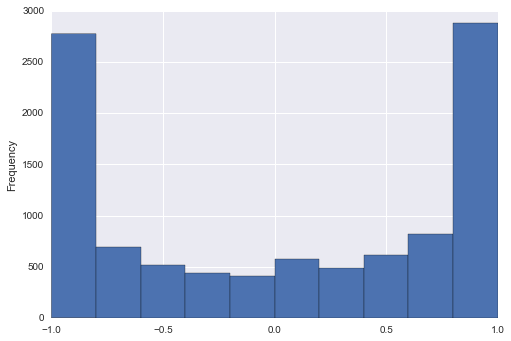

In [9]:
namechartdiff.MMF.plot(kind= "hist")

/Users/rogerhuang/downloads/ENTER/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


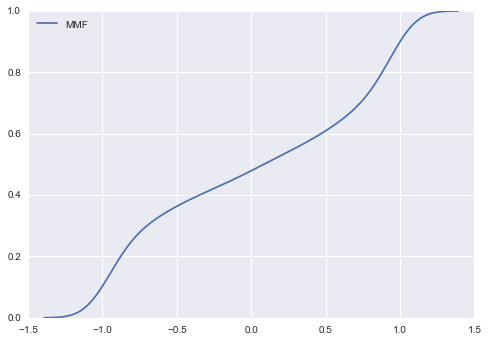

In [15]:
sns.kdeplot(namechartdiff.MMF.dropna(), cumulative = True)

In [ ]:
sns.kdeplot(namechartdiff.MMF.dropna(), shadow = True)

In [229]:
namegroup["Roger"]["M"]

437870

In [7]:
#http://stackoverflow.com/questions/11973741/filtering-and-selecting-from-pivot-tables-made-with-python-pandas
namestack = pd.pivot_table(names,index =["Name", "Gender"], values = ["Count"], aggfunc = "sum")
namestack.head(25)

Count
Name      Gender       
Aaban     M          72
Aabha     F          21
Aabid     M           5
Aabriella F          10
Aadam     M         196
Aadan     M         112
Aadarsh   M         158
Aaden     F           5
          M        3915
Aadesh    M          15
Aadhav    M         102
Aadhavan  M          19
Aadhi     M          12
Aadhira   F          29
Aadhya    F         639
Aadhyan   M           5
Aadi      F          16
          M         667
Aadian    M           5
Aadil     M         297
Aadin     M         112
Aadish    M          17
Aadison   F          11
Aadit     M         267
Aadith    M          39

In [8]:
namestack = namestack.fillna(value = 0)
namestack

Count
Name      Gender       
Aaban     M          72
Aabha     F          21
Aabid     M           5
Aabriella F          10
Aadam     M         196
Aadan     M         112
Aadarsh   M         158
Aaden     F           5
          M        3915
Aadesh    M          15
Aadhav    M         102
Aadhavan  M          19
Aadhi     M          12
Aadhira   F          29
Aadhya    F         639
Aadhyan   M           5
Aadi      F          16
          M         667
Aadian    M           5
Aadil     M         297
Aadin     M         112
Aadish    M          17
Aadison   F          11
Aadit     M         267
Aadith    M          39
Aaditri   F          26
Aaditya   M         457
Aadiv     M          11
Aadon     M         100
Aadrian   M           5
...                 ...
Zyrese    M           5
Zyrhiana  F           6
Zyri      F           6
Zyria     F         339
Zyriah    F         321
Zyrian    M          10
Zyriana   F          24
Zyrianna  F          41
Zyrie     F          13
Zyriel    F          10
Zyrielle  F          22
Zyrihanna F          45
Zyrin     M          10
Zyrion    M          84
Zyriyah   F          11
Zyron     M         161
Zyrus     M          51
Zysean    M           5
Zyshaun   M          34
Zyshawn   M         146
Zyshon    M          19
Zyshonne  M         101
Zytaevius M           5
Zytaveon  M          15
Zytavion  M           5
Zytavious M          43
Zyvion    M           5
Zyyanna   F           6
Zyyon     M           6
Zzyzx     M           5

[104110 rows x 1 columns]

In [187]:
#namestack is the table I want to process, but there are problems getting the columns to work
#to split test and train sets with letter transitions for test/train -- vectorizer n-character grams construct a table based on 3-gram or 4-gram character transitions, shingle lists
#vectorize the name column into grams
#set presicion per f/m split
namestack[namestack.Name == "Mary"]

AttributeError: 'DataFrame' object has no attribute 'Name'

In [188]:
namestack[namestack.index == "John"]

,,Count
Name,Gender,


In [189]:
namestack.tail(25)

,,Count
Name,Gender,
Zyrian,M,10
Zyriana,F,24
Zyrianna,F,41
Zyrie,F,13
Zyriel,F,10
Zyrielle,F,22
Zyrihanna,F,45
Zyrin,M,10
Zyrion,M,84


In [1]:
namestack.columns

NameError: name 'namestack' is not defined

In [198]:
namestack.query('Name == ["Roger"]')

Count
Name  Gender        
Roger F         1689
      M       437870

In [10]:
now = names[names.Year == 2014]
now.head(20)
#groupby and do gender count by name : Name, Gender, Count
#using data from all of the years could be useful ex: edge cases like winfred
#consider adding UK name set
#consider looking into pivottable : http://pandas.pydata.org/pandas-docs/stable/reshaping.html

#binary classification can be used for names in the table
#Naive Bayes model can be built on character traits and character transitions to define a name not in the table 
#go through coursereport and take 500 names

#Action items for next week
#1 - Clean up the dataframe here, do a first pass for the gender classifier
#2 - Draft more on the story of the project
#3 - Use requests and BS4 and get at least 300-500 names from CourseReport

,Id,Name,Year,Gender,Count
1792389,1792390,Emma,2014,F,20799
1792390,1792391,Olivia,2014,F,19674
1792391,1792392,Sophia,2014,F,18490
1792392,1792393,Isabella,2014,F,16950
1792393,1792394,Ava,2014,F,15586
1792394,1792395,Mia,2014,F,13442
1792395,1792396,Emily,2014,F,12562
1792396,1792397,Abigail,2014,F,11985
1792397,1792398,Madison,2014,F,10247
1792398,1792399,Charlotte,2014,F,10048


In [12]:
nowmale = now[now.Gender == "M"]
nowmale.head(3)

,Id,Name,Year,Gender,Count
1811456,1811457,Noah,2014,M,19144
1811457,1811458,Liam,2014,M,18342
1811458,1811459,Mason,2014,M,17092


In [13]:
nowemma = now[now.Name == "Emma"]
nowemma.head(3)

,Id,Name,Year,Gender,Count
1792389,1792390,Emma,2014,F,20799
1818165,1818166,Emma,2014,M,12


In [13]:
fortyfive = names[names.Year == 1945]
fortyfive.head(10)

,Id,Name,Year,Gender,Count
412324,412325,Mary,1945,F,59284
412325,412326,Linda,1945,F,41465
412326,412327,Barbara,1945,F,38272
412327,412328,Patricia,1945,F,35841
412328,412329,Carol,1945,F,30387
412329,412330,Sandra,1945,F,24700
412330,412331,Nancy,1945,F,21454
412331,412332,Sharon,1945,F,20832
412332,412333,Judith,1945,F,20187
412333,412334,Susan,1945,F,19223


In [14]:
fortyfivemen = fortyfive[fortyfive.Gender == "M"]
fortyfivemen.head(5)

,Id,Name,Year,Gender,Count
417567,417568,James,1945,M,74450
417568,417569,Robert,1945,M,69926
417569,417570,John,1945,M,66123
417570,417571,William,1945,M,50209
417571,417572,Richard,1945,M,46045


In [15]:
fortyfivemen.tail(5)

,Id,Name,Year,Gender,Count
421344,421345,Ysmael,1945,M,5
421345,421346,Zacarias,1945,M,5
421346,421347,Zach,1945,M,5
421347,421348,Zachariah,1945,M,5
421348,421349,Zenon,1945,M,5


## Importing names from Course Report

In [63]:
#1 how do I automate this across different pages? Different workshops, different pages
#create base string and loop
review = requests.get("https://www.coursereport.com/schools/galvanize?page=1#/reviews")
r = BeautifulSoup(review.text, "lxml")
first_name = r.find_all('div', {'class': 'reviewer-details'})

In [64]:
print(first_name)

[<div class="reviewer-details"><span class="reviewer-name">Anonymous</span><span> • Developer Evangelist </span><span></span><span class="hidden-xs"> •  Course: Web Development </span><span class="hidden-xs"> •  Campus: Boulder </span></div>, <div class="reviewer-details"><span class="reviewer-name">kt </span><span> • Front-End Engineer  </span><span> • Graduate </span><span class="hidden-xs"> •  Course: Web Development </span><span class="hidden-xs"> •  Campus: San Francisco </span></div>, <div class="reviewer-details"><span class="reviewer-name">Anonymous</span><span></span><span> • Graduate </span><span class="hidden-xs"> •  Course: Galvanize Data Science </span><span class="hidden-xs"> •  Campus: San Francisco </span></div>, <div class="reviewer-details"><span class="reviewer-name">Anonymous</span><span></span><span> • Graduate </span><span class="hidden-xs"> •  Course: Galvanize Data Science </span><span class="hidden-xs"> •  Campus: San Francisco </span></div>, <div class="review

In [46]:
spans = r.find_all('span', attrs={'class':'reviewer-name'})
for span in spans:
    print (span.string)

Anonymous
kt 
Anonymous
Anonymous
Steve 
Anna VM 
Jennifer Dunne 
Josh Cantor 
Anonymous
Gerard Cote 
Anonymous
Anonymous
Alex Braun 
Anonymous
Elana Kopelevich 
Anonymous
Anonymous
Colin 
Anonymous
Eric Hullander 
Anonymous
Japneet Singh 
J 
Anonymous
Anonymous


In [51]:
cleanspans = []
for span in spans:
    if span.string != "Anonymous":
        cleanspans.append(span)
        print (span.string)


kt 
Steve 
Anna VM 
Jennifer Dunne 
Josh Cantor 
Gerard Cote 
Alex Braun 
Elana Kopelevich 
Colin 
Eric Hullander 
Japneet Singh 
J 


In [151]:
byte = []
def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = BeautifulSoup(response.text, "lxml")
        spans = data.find_all('span', attrs={'class':'reviewer-name'})
        for span in spans:
            if span.string != "Anonymous":
                byte.append(span.string)
    else:
        return(response.text)
        return(response.status_code)

In [128]:
page_url = 1
for i in range(5): # 5 pages of 20 results each
    base_url = "https://www.coursereport.com/schools/galvanize?page="   
    url = base_url + str(page_url) + "#/reviews"
    data = get_data(url)
    page_url += 1

In [126]:
print(data)

kt 


In [118]:
base_url = "https://www.coursereport.com/schools/galvanize?page="   
url = base_url + str(2) + "#/reviews"
get_data(url)

In [120]:
get_data("https://www.coursereport.com/schools/galvanize?page=2#/reviews")

In [129]:
print(cleanspans)

['kt ', 'Steve ', 'Anna VM ', 'Jennifer Dunne ', 'Josh Cantor ', 'Gerard Cote ', 'Alex Braun ', 'Elana Kopelevich ', 'Colin ', 'Eric Hullander ', 'Japneet Singh ', 'J ', 'M ', 'Moses Marsh ', 'Frank ', 'Derik Linch ', 'Tim Hou ', 'Matthew Bird ', 'Anonymous ', 'Robert Hajek ', 'Anonymous ', 'Roberto Ortega ', 'Anonymous ', 'Taylor ', 'Anonymous ', 'Scott Cronin ', 'Anonymous ', 'Anonymous ', 'Jeffrey Roach ', 'Anonymous ', 'Zubair Desai ', 'Lorien S. ', 'Tony Nguyen ', 'Mike ', 'Anonymous ', 'Anonymous ', 'Cameron ', 'Layne ']


In [135]:
galvanize = set(cleanspans)

In [136]:
print(galvanize)

{'Josh Cantor ', 'Layne ', 'Taylor ', 'Jennifer Dunne ', 'Colin ', 'J ', 'Gerard Cote ', 'Moses Marsh ', 'Lorien S. ', 'Cameron ', 'Matthew Bird ', 'Derik Linch ', 'Robert Hajek ', 'Elana Kopelevich ', 'Japneet Singh ', 'Scott Cronin ', 'Anonymous ', 'Alex Braun ', 'Zubair Desai ', 'Mike ', 'Roberto Ortega ', 'Jeffrey Roach ', 'Tim Hou ', 'Tony Nguyen ', 'Anna VM ', 'kt ', 'Eric Hullander ', 'Steve ', 'M ', 'Frank '}


In [137]:
len(galvanize)

30

In [142]:
page_url = 1
for i in range(5): # 5 pages of 20 results each
    base_url = "https://www.coursereport.com/schools/nyc-data-science-academy?page="   
    url = base_url + str(page_url) + "#/reviews"
    data = get_data(url)
    page_url += 1

In [143]:
print(nyc)

['Jurgen de Jager ', 'Arda Kosar ', 'Tingyan Zheng ', 'Bin Lin ', 'Melita ', 'Tatiana Sorokina ', 'Robert Castellano ', 'Jiaqi L ', 'Iris Huang ', 'Ho Fai Wong ', 'Kelly ', 'Denis Nguyen ', 'Yuka ', 'Adam Cone ', 'Wendy ', 'David Steinmetz ', 'Anonymous ', 'Anonymous ', 'Christopher Redino ', 'Sricharan Maddineni ', 'Joseph Lee ', 'Korrigan ', 'Fangzhou ', 'John ', 'Anonymous ', 'Sebastian Nordgren ', 'Jake ', 'David Comfort ', 'Nate Aiken ', 'JF Darre ', 'Shin Chin ', 'Dani ', 'Jason ', 'Pokman ', 'Punam ', 'Sam ', 'Liz ', 'Bret Fontecchio ', 'Anonymous ', 'Anonymous ', 'anonymous ', 'Anonymous ']


In [144]:
nyc = set(nyc)
print(nyc)

{'Sebastian Nordgren ', 'Jiaqi L ', 'Ho Fai Wong ', 'Adam Cone ', 'Liz ', 'Bin Lin ', 'Punam ', 'Korrigan ', 'Melita ', 'Denis Nguyen ', 'Sam ', 'Wendy ', 'Arda Kosar ', 'Jurgen de Jager ', 'Nate Aiken ', 'Kelly ', 'Anonymous ', 'Bret Fontecchio ', 'Shin Chin ', 'Fangzhou ', 'Jake ', 'Tingyan Zheng ', 'Dani ', 'Robert Castellano ', 'Tatiana Sorokina ', 'Sricharan Maddineni ', 'Jason ', 'Joseph Lee ', 'David Comfort ', 'Iris Huang ', 'Yuka ', 'JF Darre ', 'Pokman ', 'anonymous ', 'John ', 'David Steinmetz ', 'Christopher Redino '}


In [145]:
len(nyc)

37

In [147]:
page_url = 1
for i in range(5): # 5 pages of 20 results each
    base_url = "https://www.coursereport.com/schools/metis?page="   
    url = base_url + str(page_url) + "#/reviews"
    data = get_data(url)
    page_url += 1

In [148]:
print(metis)

['Max Melnick ', 'Emmanuele Salvati ', 'Brian Kim ', 'Anonymous ', 'Anonymous ', 'Anonymous ', 'Revanth Reddy Garlapati ', 'Anonymous ', 'Anonymous ']


In [149]:
metis = set(metis)
print(metis)

{'Brian Kim ', 'Emmanuele Salvati ', 'Anonymous ', 'Revanth Reddy Garlapati ', 'Max Melnick '}


In [150]:
len(metis)

5

In [152]:
page_url = 1
for i in range(5): # 5 pages of 20 results each
    base_url = "https://www.coursereport.com/schools/byte-academy?page="   
    url = base_url + str(page_url) + "#/reviews"
    data = get_data(url)
    page_url += 1

In [153]:
print(byte)

['Ben ', 'Matt ', 'Nat Greenwald ', 'Rod ', 'Dan ', 'Sulekha ', 'Anonymous ', 'Anonymous ', 'Anonymous ', 'Shehryar Khan ', 'Anonymous ', 'Cody ', 'Graduate ', 'Josh ', 'Anonymous ', 'Anonymous ', 'Anonymous ', 'Yulia ', 'Benjamin Mukasa ', 'Anonymous ', 'Anthony ', 'Adam J ', 'Anonymous ', 'Jesse ', 'Anonymous ', 'Anonymous ', 'Anonymous ', 'William mantly ', 'Anthony Keating ', 'Anonymous ']


In [154]:
byte = set(byte)
print(byte)

{'Sulekha ', 'Dan ', 'Josh ', 'Benjamin Mukasa ', 'William mantly ', 'Ben ', 'Cody ', 'Anthony Keating ', 'Shehryar Khan ', 'Matt ', 'Anthony ', 'Nat Greenwald ', 'Graduate ', 'Adam J ', 'Yulia ', 'Anonymous ', 'Rod ', 'Jesse '}


In [155]:
len(byte)

18